In [12]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath('../scripts'))

In [13]:
from db_connection import load_data

In [3]:
from Engagement_Analysis import (aggregate_engagement_metrics,normalize_and_cluster,compute_cluster_statistics,
                                 top_engaged_users_per_app,plot_top_app_usage,elbow_method)

In [14]:
DB_PARAMS = {
    'dbname': 'telecom',
    'user': 'postgres',
    'password': 'admin',
    'host': 'localhost',
    'port': '5432'
}

# SQL query to execute
query = "SELECT * FROM xdr_data;"

# Load data using psycopg2
df = load_data(DB_PARAMS, query)

c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_2\kifiya_week_2\scripts\db_connection.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [15]:
engagement_agg = aggregate_engagement_metrics(df)
print(engagement_agg.head(10))  # View top 10 customers

    User MSISDN  Total Sessions  Total Duration (ms)  Total Download (Bytes)  \
0  3.360100e+10               1             116720.0            8.426375e+08   
1  3.360100e+10               1             181230.0            1.207552e+08   
2  3.360100e+10               1             134969.0            5.566597e+08   
3  3.360101e+10               1              49878.0            4.019932e+08   
4  3.360101e+10               2              37104.0            1.363130e+09   
5  3.360101e+10               2             253983.0            5.552080e+08   
6  3.360101e+10               2             128360.0            5.530412e+08   
7  3.360101e+10               1              86399.0            2.940851e+08   
8  3.360101e+10               2             495702.0            8.965602e+08   
9  3.360102e+10               1             124854.0            6.853728e+08   

   Total Upload (Bytes)  Total Traffic (Bytes)  
0            36053108.0           8.786906e+08  
1            36104459

In [16]:
# Call the function to normalize and classify users into 3 clusters
clustered_data, kmeans_model = normalize_and_cluster(engagement_agg)
print(clustered_data.head())

    User MSISDN  Total Sessions  Total Duration (ms)  Total Download (Bytes)  \
0  3.360100e+10               1             116720.0            8.426375e+08   
1  3.360100e+10               1             181230.0            1.207552e+08   
2  3.360100e+10               1             134969.0            5.566597e+08   
3  3.360101e+10               1              49878.0            4.019932e+08   
4  3.360101e+10               2              37104.0            1.363130e+09   

   Total Upload (Bytes)  Total Traffic (Bytes)  Engagement Cluster  
0            36053108.0           8.786906e+08                   2  
1            36104459.0           1.568596e+08                   2  
2            39306820.0           5.959665e+08                   2  
3            20327526.0           4.223207e+08                   2  
4            94280527.0           1.457411e+09                   0  


In [17]:
cluster_stats = compute_cluster_statistics(clustered_data)
print(cluster_stats)

  Engagement Cluster Total Sessions                      Total Duration (ms)  \
                                min max      mean    sum                 min   
0                  0              1   4  2.184791  46228             18235.0   
1                  1              3  18  4.258194  17020             49323.0   
2                  2              0   2  1.043550  85258              7142.0   

                                           Total Traffic (Bytes)  \
          max           mean           sum                   min   
0   3174824.0  215100.806229  4.551318e+09          2.842182e+08   
1  18553754.0  572159.112084  2.286920e+09          1.085994e+09   
2   1573420.0  107473.680857  8.780600e+09          3.324901e+07   

                                             
            max          mean           sum  
0  1.915933e+09  1.138979e+09  2.409966e+13  
1  8.846226e+09  2.294204e+09  9.169934e+12  
2  1.427100e+09  4.964976e+08  4.056385e+13  


In [18]:
top_social_media_users = top_engaged_users_per_app(df, 'Social Media DL (Bytes)')
print(top_social_media_users)

        MSISDN/Number  Social Media DL (Bytes)
13526    3.362632e+10               42743837.0
92923    3.376054e+10               39297646.0
37052    3.365973e+10               34900444.0
6437     3.361489e+10               27749744.0
13180    3.362578e+10               26564121.0
65118    3.366716e+10               23753753.0
106137   3.378632e+10               23568655.0
70960    3.366907e+10               23477047.0
666      3.360313e+10               22776679.0
31331    3.365849e+10               22695673.0


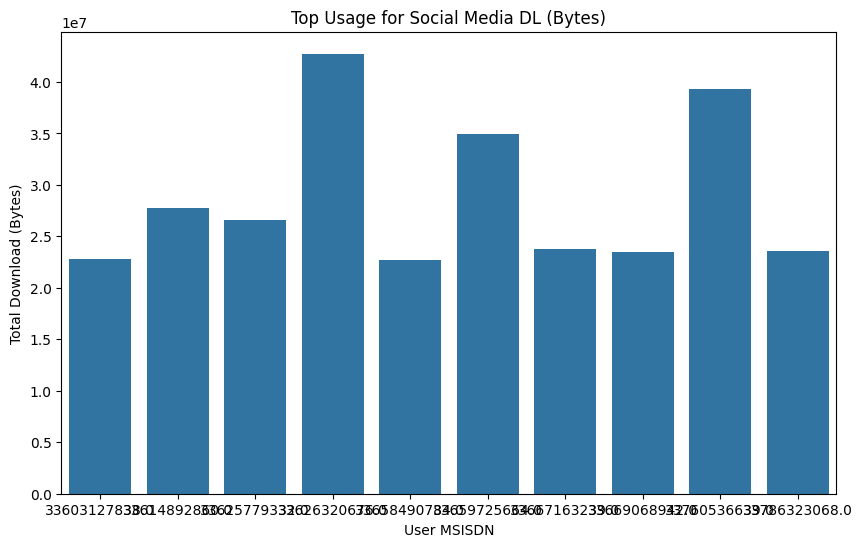

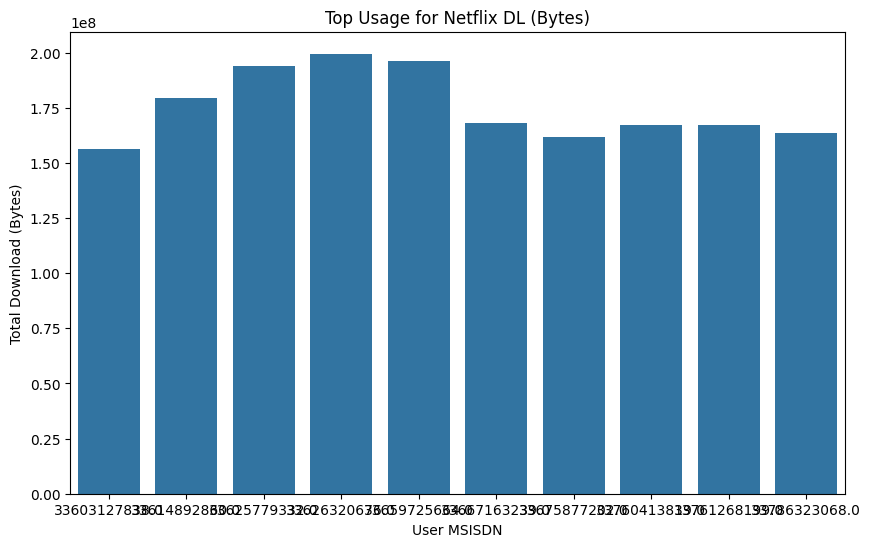

In [19]:
top_apps = ['Social Media DL (Bytes)', 'Netflix DL (Bytes)']
plot_top_app_usage(df, top_apps)

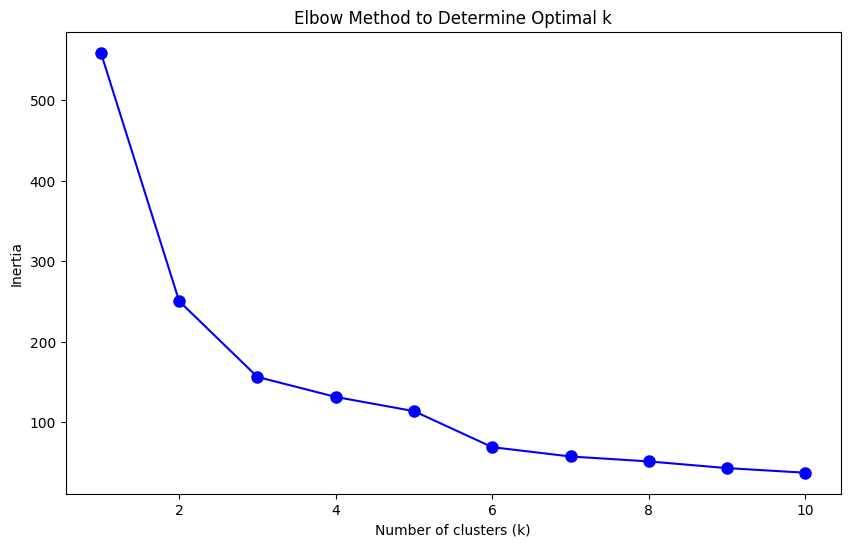

In [20]:
elbow_method(engagement_agg)